## Import necessary libraries

In [38]:
import datetime
import pandas as pd
import matplotlib.pyplot as plt
import seaborn
import os
seaborn.set()

## Combine 12 csv files into 1

In [7]:
# get all our csv files and store them in a list
files = []
for file in os.listdir("./Sales_Data"):
    files.append(file)  

# df that will store concat all the months csv into one
all_months_data = pd.DataFrame()

for file in files:
    df = pd.read_csv("./Sales_Data/" + file)
    # merge all csvs together
    all_months_data = pd.concat([all_months_data, df])
    
#all_months_data.head()
# save new csv, with all months.
all_months_data.to_csv("all_months_data.csv")

## Read in new csv file all_months_data

In [8]:
all_data = pd.read_csv("all_months_data.csv")
all_data.head()

,Unnamed: 0,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,1,NaN,NaN,NaN,NaN,NaN,NaN
2,2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


## Data cleaning

In [10]:
# Remove all the NaNs in the dataframe

# will retrieve all the NaNs in the all_data df and will be assigned to nan_df
nan_df = all_data[all_data.isna().any(axis=1)]
#nan_df.head()

# drop all the rows with NaNs from all_data df
all_data = all_data.dropna(axis=0)
# reset the indices since we dropped all NaNs
all_data = all_data.reset_index(drop=True)
all_data.head()

,Unnamed: 0,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
2,3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
3,4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


In [13]:
# removing all "Ors" and delete them, found when trying to convert the Month from Order Date to an int
temp_df = all_data[all_data['Order Date'].str[0:2] == 'Or']
temp_df.head()

# now we found out what rows have the 'Or' value in the Month column...
# we can exclude them from our all_data df
all_data = all_data[all_data["Order Date"].str[0:2]!='Or']

In [16]:
# Convert the month from Order Date, Quantity Ordered into an int and Price Each into a float
all_data['Month'] = all_data['Order Date'].str[0:2]
all_data['Month'] = pd.to_numeric(all_data['Month'])
all_data['Quantity Ordered'] = pd.to_numeric(all_data['Quantity Ordered'])
all_data['Price Each'] = pd.to_numeric(all_data['Price Each'])

all_data.head()

,Unnamed: 0,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
1,2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4
2,3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
3,4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4


## Adding aditional columns to the dataframe

In [26]:
all_data['Sales'] = all_data['Quantity Ordered'] * all_data['Price Each']
del all_data['Unnamed: 0']
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
1,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
2,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
3,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
4,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99


## What city has the highest number of sales

In [82]:
# add a city column to our dataframe
all_data['City'] = all_data['Purchase Address'].str.split(',').apply(lambda x: x[1] + ' ' +x[2].split(' ')[1])
all_data.head(100)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas TX
1,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston MA
2,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles CA
3,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles CA
4,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles CA
...,...,...,...,...,...,...,...,...,...
95,176649,USB-C Charging Cable,1,11.95,04/09/19 08:49,"702 11th St, San Francisco, CA 94016",4,11.95,San Francisco CA
96,176650,Lightning Charging Cable,1,14.95,04/12/19 16:47,"153 River St, Boston, MA 02215",4,14.95,Boston MA
97,176651,iPhone,1,700.00,04/07/19 13:14,"997 South St, Boston, MA 02215",4,700.00,Boston MA
98,176652,LG Washing Machine,1,600.00,04/09/19 20:04,"502 14th St, New York City, NY 10001",4,600.00,New York City NY


In [36]:
highest_sales = all_data.groupby('City').sum().round(2)
highest_sales.sort_values("Sales", axis = 0, ascending = False)

,Quantity Ordered,Price Each,Month,Sales
City,,,,
San Francisco CA,50239,8211461.74,315520,8262203.91
Los Angeles CA,33289,5421435.23,208325,5452570.80
New York City NY,27932,4635370.83,175741,4664317.43
Boston MA,22528,3637409.77,141112,3661642.01
Atlanta GA,16602,2779908.20,104794,2795498.58
Dallas TX,16730,2752627.82,104620,2767975.40
Seattle WA,16553,2733296.01,104941,2747755.48
Portland OR,11303,1860558.22,70621,1870732.34
Austin TX,11153,1809873.61,69829,1819581.75


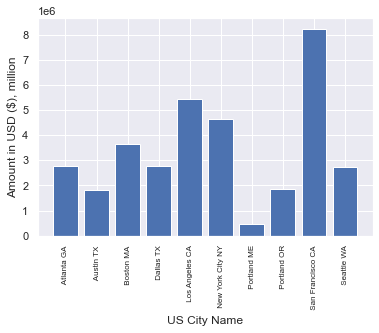

In [40]:
# Bar chart to visualize the data chart above
cities = [city for city, df in all_data.groupby('City')]

# the y-axis is in millions
plt.bar(cities, highest_sales['Sales'])
plt.xticks(cities, rotation = "vertical", size = 8)
plt.ylabel("Amount in USD ($), million")
plt.xlabel("US City Name")
plt.show()


## Find out what pairs of items sell the best in San Francisco

In [121]:
# Create a new DF with only data from San Francisco
all_data['City'].str[1:17] == "San Francisco CA"
df = all_data[all_data['City'].str[1:17] == "San Francisco CA"]
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
5,176562,USB-C Charging Cable,1,11.95,04/29/19 13:03,"381 Wilson St, San Francisco, CA 94016",4,11.95,San Francisco CA
8,176565,Macbook Pro Laptop,1,1700.00,04/24/19 10:38,"915 Willow St, San Francisco, CA 94016",4,1700.00,San Francisco CA
16,176573,USB-C Charging Cable,1,11.95,04/27/19 18:41,"214 Chestnut St, San Francisco, CA 94016",4,11.95,San Francisco CA
28,176584,Flatscreen TV,1,300.00,04/24/19 20:39,"936 Church St, San Francisco, CA 94016",4,300.00,San Francisco CA
31,176586,AAA Batteries (4-pack),2,2.99,04/10/19 17:00,"365 Center St, San Francisco, CA 94016",4,5.98,San Francisco CA
...,...,...,...,...,...,...,...,...,...
186299,259352,USB-C Charging Cable,1,11.95,09/07/19 15:49,"976 Forest St, San Francisco, CA 94016",9,11.95,San Francisco CA
186301,259354,iPhone,1,700.00,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016",9,700.00,San Francisco CA
186302,259355,iPhone,1,700.00,09/23/19 07:39,"220 12th St, San Francisco, CA 94016",9,700.00,San Francisco CA
186303,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016",9,379.99,San Francisco CA


In [122]:
# In order to find what items were sold together most often, we can take the Order ID and see how many duplicates there are
# this new df will contain only the order IDs that occur more than once
duplicated_df = df[df['Order ID'].duplicated(keep=False)]
duplicated_df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
31,176586,AAA Batteries (4-pack),2,2.99,04/10/19 17:00,"365 Center St, San Francisco, CA 94016",4,5.98,San Francisco CA
32,176586,Google Phone,1,600.00,04/10/19 17:00,"365 Center St, San Francisco, CA 94016",4,600.00,San Francisco CA
263,176808,Google Phone,1,600.00,04/28/19 18:03,"933 Meadow St, San Francisco, CA 94016",4,600.00,San Francisco CA
264,176808,Wired Headphones,1,11.99,04/28/19 18:03,"933 Meadow St, San Francisco, CA 94016",4,11.99,San Francisco CA
433,176975,USB-C Charging Cable,1,11.95,04/23/19 15:46,"28 13th St, San Francisco, CA 94016",4,11.95,San Francisco CA
...,...,...,...,...,...,...,...,...,...
185965,259035,27in FHD Monitor,1,149.99,09/29/19 13:52,"327 Lake St, San Francisco, CA 94016",9,149.99,San Francisco CA
186209,259270,Google Phone,1,600.00,09/06/19 15:27,"940 10th St, San Francisco, CA 94016",9,600.00,San Francisco CA
186210,259270,USB-C Charging Cable,1,11.95,09/06/19 15:27,"940 10th St, San Francisco, CA 94016",9,11.95,San Francisco CA
186296,259350,Google Phone,1,600.00,09/30/19 13:49,"519 Maple St, San Francisco, CA 94016",9,600.00,San Francisco CA


In [123]:
# Now we want to create a new column Grouped and have the products with identical Order ID in that column
# To be more specific, we are looking for the products that have the same Order ID
duplicated_df["Grouped"] = duplicated_df.groupby('Order ID')['Product'].transform(lambda x: ", ".join(x))
duplicated_df

<ipython-input-123-4ad4532e926d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  duplicated_df["Grouped"] = duplicated_df.groupby('Order ID')['Product'].transform(lambda x: ", ".join(x))


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Grouped
31,176586,AAA Batteries (4-pack),2,2.99,04/10/19 17:00,"365 Center St, San Francisco, CA 94016",4,5.98,San Francisco CA,"AAA Batteries (4-pack), Google Phone"
32,176586,Google Phone,1,600.00,04/10/19 17:00,"365 Center St, San Francisco, CA 94016",4,600.00,San Francisco CA,"AAA Batteries (4-pack), Google Phone"
263,176808,Google Phone,1,600.00,04/28/19 18:03,"933 Meadow St, San Francisco, CA 94016",4,600.00,San Francisco CA,"Google Phone, Wired Headphones"
264,176808,Wired Headphones,1,11.99,04/28/19 18:03,"933 Meadow St, San Francisco, CA 94016",4,11.99,San Francisco CA,"Google Phone, Wired Headphones"
433,176975,USB-C Charging Cable,1,11.95,04/23/19 15:46,"28 13th St, San Francisco, CA 94016",4,11.95,San Francisco CA,"USB-C Charging Cable, AAA Batteries (4-pack)"
...,...,...,...,...,...,...,...,...,...,...
185965,259035,27in FHD Monitor,1,149.99,09/29/19 13:52,"327 Lake St, San Francisco, CA 94016",9,149.99,San Francisco CA,"27in FHD Monitor, 27in FHD Monitor"
186209,259270,Google Phone,1,600.00,09/06/19 15:27,"940 10th St, San Francisco, CA 94016",9,600.00,San Francisco CA,"Google Phone, USB-C Charging Cable"
186210,259270,USB-C Charging Cable,1,11.95,09/06/19 15:27,"940 10th St, San Francisco, CA 94016",9,11.95,San Francisco CA,"Google Phone, USB-C Charging Cable"
186296,259350,Google Phone,1,600.00,09/30/19 13:49,"519 Maple St, San Francisco, CA 94016",9,600.00,San Francisco CA,"Google Phone, USB-C Charging Cable"


In [124]:
# now we want to remove the duplicate order IDs from the data frame
duplicated_df = duplicated_df[['Order ID', 'Grouped']].drop_duplicates()
duplicated_df

,Order ID,Grouped
31,176586,"AAA Batteries (4-pack), Google Phone"
263,176808,"Google Phone, Wired Headphones"
433,176975,"USB-C Charging Cable, AAA Batteries (4-pack)"
579,177115,"iPhone, Lightning Charging Cable"
582,177117,"ThinkPad Laptop, AAA Batteries (4-pack)"
...,...,...
185535,258625,"Lightning Charging Cable, Bose SoundSport Head..."
185619,258707,"Bose SoundSport Headphones, USB-C Charging Cable"
185964,259035,"27in FHD Monitor, 27in FHD Monitor"
186209,259270,"Google Phone, USB-C Charging Cable"


## Count the number of product products

In [125]:
from itertools import combinations
from collections import Counter

In [139]:
count = Counter() # "dictionary" like, user-defined iterable

for row in duplicated_df['Grouped']:
    row_list = row.split(', ') # split the items in grouped by a comma
    count.update(Counter(combinations(row_list,2))) # will give us the most common pair(2) of items bought together
    # as a side note, the second parameter (2) can be changed to any number

for key, value in count.most_common(20):
    print(key,value)

('iPhone', 'Lightning Charging Cable') 251
('Google Phone', 'USB-C Charging Cable') 240
('iPhone', 'Wired Headphones') 116
('iPhone', 'Apple Airpods Headphones') 95
('Google Phone', 'Wired Headphones') 91
('Vareebadd Phone', 'USB-C Charging Cable') 89
('Google Phone', 'Bose SoundSport Headphones') 51
('USB-C Charging Cable', 'Wired Headphones') 48
('Vareebadd Phone', 'Wired Headphones') 40
('Lightning Charging Cable', 'Wired Headphones') 27
('Vareebadd Phone', 'Bose SoundSport Headphones') 21
('Lightning Charging Cable', 'Apple Airpods Headphones') 20
('Lightning Charging Cable', 'Lightning Charging Cable') 18
('Apple Airpods Headphones', 'Wired Headphones') 18
('AA Batteries (4-pack)', 'Lightning Charging Cable') 15
('AA Batteries (4-pack)', 'Wired Headphones') 15
('USB-C Charging Cable', 'Bose SoundSport Headphones') 14
('AA Batteries (4-pack)', 'USB-C Charging Cable') 14
('USB-C Charging Cable', 'USB-C Charging Cable') 13
('Bose SoundSport Headphones', 'Wired Headphones') 13


## What single item sold the most in San Francisco

In [153]:
df.head()
df.groupby('Product').sum()

,Quantity Ordered,Price Each,Month,Sales
Product,,,,
20in Monitor,1000,109220.07,7313,109990.00
27in 4K Gaming Monitor,1460,567825.44,10213,569385.40
27in FHD Monitor,1814,270431.97,12639,272081.86
34in Ultrawide Monitor,1446,547945.58,10078,549465.54
AA Batteries (4-pack),6555,18827.52,34524,25171.20
AAA Batteries (4-pack),7408,14746.68,35049,22149.92
Apple Airpods Headphones,3733,555750.00,25749,559950.00
Bose SoundSport Headphones,3317,328667.13,23386,331666.83
Flatscreen TV,1154,344700.00,8351,346200.00


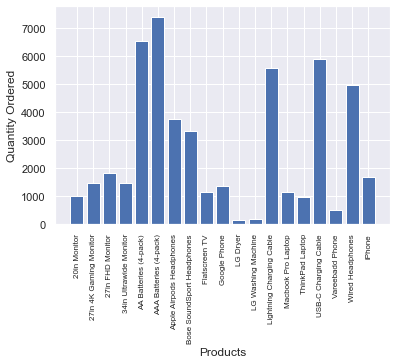

In [137]:
# we are going to groupby Product and sum the Quantity Ordered to get the most sold product
products_group = df.groupby('Product')
quantity_ordered = products_group.sum()['Quantity Ordered'] # sum all the quantity ordered for each product.

products = [product for product, df in products_group]

plt.bar(products, quantity_ordered)
plt.ylabel('Quantity Ordered')
plt.xlabel('Products')
plt.xticks(products, rotation='vertical',size = 8)
plt.show()

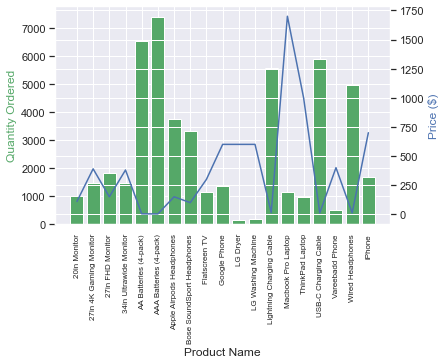

In [148]:
prices = df.groupby('Product').mean()["Price Each"]

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(products, quantity_ordered, color = 'g')
ax2.plot(products, prices, 'b-')

ax1.set_xlabel('Product Name')
ax1.set_ylabel('Quantity Ordered', color = 'g')
ax2.set_ylabel('Price ($)', color = 'b')
ax1.set_xticklabels(products, rotation = 'vertical', size=8)

plt.show()